In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer, classification_report, accuracy_score, jaccard_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from subprocess import check_output
# from sklearn.externals import joblib
from joblib import dump, load
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


print("Checking files in data location ...")
# train_dir = '/Users/Gabriel/Dropbox/Research/ASPIDE/Datasets/ECI Chaos/Distributed Phase 1/finalized/single_node/training'
train_dir = '/home/gabriel/Research/Aspide/workspace/data_phase'
print(check_output(["ls", train_dir]).decode("utf8"))

Checking files in data location ...
data
df_anomaly.csv
df_audsome.csv
df_clean_ausdome_single.csv
df_clean_single.csv
models
processed



In [14]:
print("Setting paths and datasets")
# Checking if directory exists for data, modells and processed

data_dir = os.path.join(train_dir,'data')
model_dir = os.path.join(train_dir,'models')
processed_dir = os.path.join(train_dir,'processed')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

Setting paths and datasets


In [15]:
df_anomaly = pd.read_csv(os.path.join(train_dir,"df_anomaly.csv"))
df_audsome = pd.read_csv(os.path.join(train_dir,"df_audsome.csv"))
df_clean = pd.read_csv(os.path.join(train_dir,"df_clean_single.csv"))
df_clean_audsome = pd.read_csv(os.path.join(train_dir,"df_clean_ausdome_single.csv"))

# Set index as time
df_anomaly.set_index('time', inplace=True)
df_audsome.set_index('time', inplace=True)
df_clean.set_index('time', inplace=True)
df_clean_audsome.set_index('time', inplace=True)

print("Dataset chosen ...")
data = df_anomaly
# drop_col = ['t1','t2','t3','t4']
print("Remove unwanted columns ...")
# print("Shape before drop: {}".format(data.shape))
# data.drop(drop_col, axis=1, inplace=True)
# print("Shape after drop: {}".format(data.shape))

Dataset chosen ...
Remove unwanted columns ...


In [16]:
# Nice print
nice_y = data['target']

# Uncomment for removing dummy
# print("Removed Dummy class")
# data.loc[data.target == "dummy", 'target'] = "0"

#Creating the dependent variable class
factor = pd.factorize(data['target'])
data.target = factor[0]
definitions = factor[1]
# print(data.target.head())
# print(definitions)

Ploting class distribution ..


<AxesSubplot:xlabel='target', ylabel='count'>

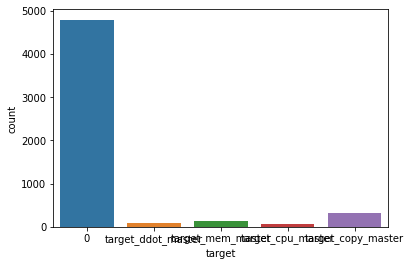

In [17]:
# Plot class distribution
print("Ploting class distribution ..")
sns.countplot(nice_y)

In [18]:
print("Splitting dataset into training and ground truth ...")
X = data.drop('target', axis=1)
y = data['target']

Splitting dataset into training and ground truth ...


In [19]:
print("Scaling dataset")
scaler = StandardScaler()
# scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns) #

Scaling dataset


In [20]:
# Randomforest best performing

params =  {
    'n_estimators': 10,
    'max_depth': 50,
    'max_features': 50,
    'min_samples_split': 5,
    'min_samples_leaf': 11,
    'criterion': 'entropy',
    'random_state': 42}

clf = RandomForestClassifier(**params)
clf

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=50,
                       min_samples_leaf=11, min_samples_split=5,
                       n_estimators=10, random_state=42)

Starting fold 1
Scaling data ....
Start training ....
Predicting ....
----------------------------------------------------------------------------------------------------
Accuracy score fold 1 is: 0.9933333333333333
Ballanced accuracy fold 1 score is: 0.9600767968573006
Jaccard score fold 1: 0.9867549668874173
Full classification report for fold 1
                    precision    recall  f1-score   support

                 0     0.9950    0.9992    0.9971      1198
target_ddot_master     1.0000    0.9565    0.9778        23
 target_mem_master     0.9412    0.9697    0.9552        33
 target_cpu_master     1.0000    0.9375    0.9677        16
target_copy_master     0.9868    0.9375    0.9615        80

          accuracy                         0.9933      1350
         macro avg     0.9846    0.9601    0.9719      1350
      weighted avg     0.9934    0.9933    0.9933      1350

Saving classification report
Imbalanced Classification report for fold 1
                          pre     

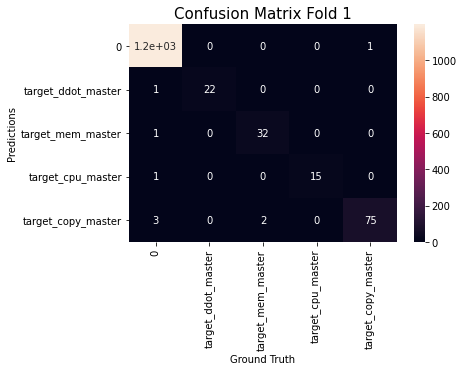

Extracting Feature improtance ...


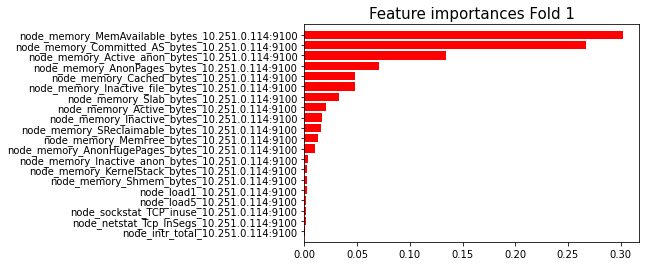

####################################################################################################
Starting fold 2
Scaling data ....
Start training ....
Predicting ....
----------------------------------------------------------------------------------------------------
Accuracy score fold 2 is: 0.9962962962962963
Ballanced accuracy fold 2 score is: 0.9513043478260869
Jaccard score fold 2: 0.992619926199262
Full classification report for fold 2
                    precision    recall  f1-score   support

                 0     0.9983    1.0000    0.9992      1198
target_ddot_master     0.9565    0.9565    0.9565        23
 target_mem_master     0.9429    1.0000    0.9706        33
 target_cpu_master     1.0000    0.8125    0.8966        16
target_copy_master     1.0000    0.9875    0.9937        80

          accuracy                         0.9963      1350
         macro avg     0.9795    0.9513    0.9633      1350
      weighted avg     0.9964    0.9963    0.9962      1350

Saving 

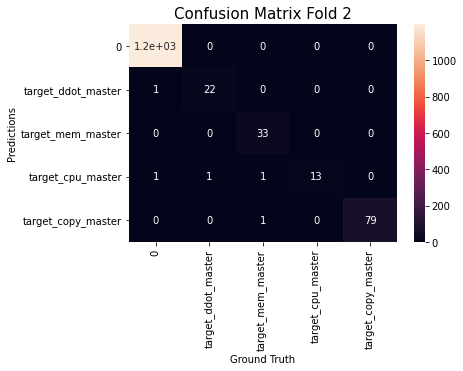

Extracting Feature improtance ...


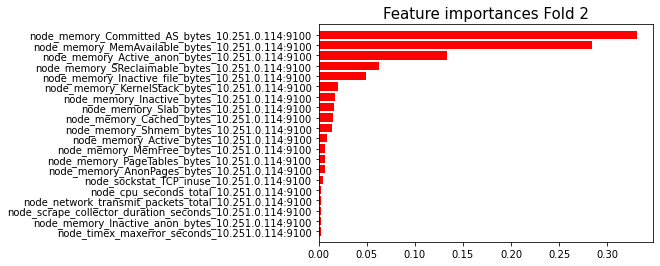

####################################################################################################
Starting fold 3
Scaling data ....
Start training ....
Predicting ....
----------------------------------------------------------------------------------------------------
Accuracy score fold 3 is: 0.9925925925925926
Ballanced accuracy fold 3 score is: 0.9337141997752072
Jaccard score fold 3: 0.9852941176470589
Full classification report for fold 3
                    precision    recall  f1-score   support

                 0     0.9958    0.9983    0.9971      1198
target_ddot_master     0.9130    0.9130    0.9130        23
 target_mem_master     0.9412    0.9697    0.9552        33
 target_cpu_master     1.0000    0.8125    0.8966        16
target_copy_master     0.9873    0.9750    0.9811        80

          accuracy                         0.9926      1350
         macro avg     0.9675    0.9337    0.9486      1350
      weighted avg     0.9926    0.9926    0.9925      1350

Saving

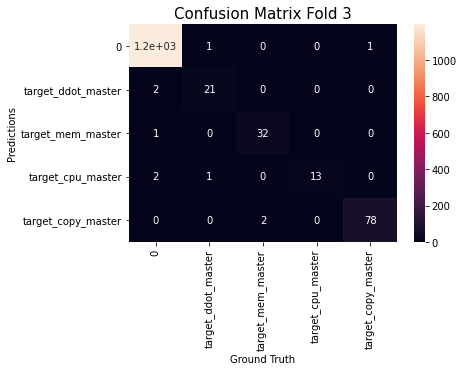

Extracting Feature improtance ...


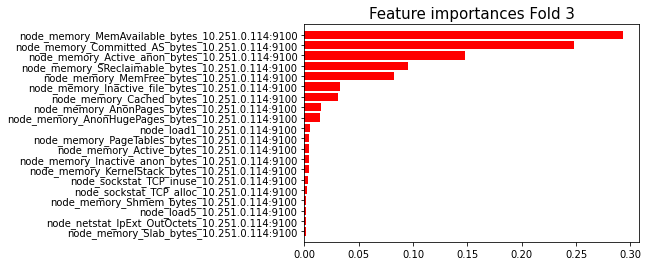

####################################################################################################
Starting fold 4
Scaling data ....
Start training ....
Predicting ....
----------------------------------------------------------------------------------------------------
Accuracy score fold 4 is: 0.9948148148148148
Ballanced accuracy fold 4 score is: 0.926548089591568
Jaccard score fold 4: 0.9896831245394252
Full classification report for fold 4
                    precision    recall  f1-score   support

                 0     0.9967    1.0000    0.9983      1198
target_ddot_master     0.9130    0.9130    0.9130        23
 target_mem_master     0.9697    0.9697    0.9697        33
 target_cpu_master     1.0000    0.7500    0.8571        16
target_copy_master     1.0000    1.0000    1.0000        80

          accuracy                         0.9948      1350
         macro avg     0.9759    0.9265    0.9476      1350
      weighted avg     0.9948    0.9948    0.9946      1350

Saving 

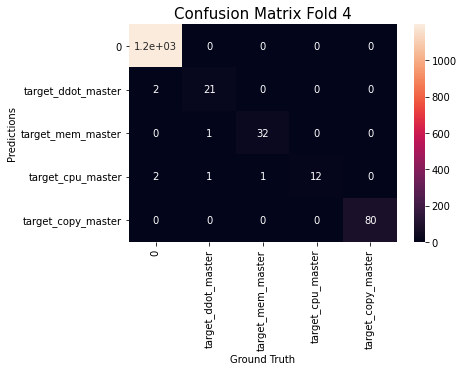

Extracting Feature improtance ...


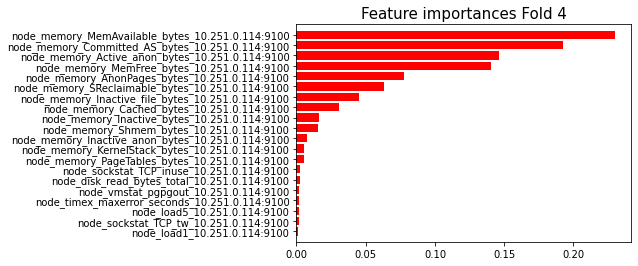

####################################################################################################
Starting fold 5
Scaling data ....
Start training ....
Predicting ....
----------------------------------------------------------------------------------------------------
Accuracy score fold 5 is: 0.9925925925925926
Ballanced accuracy fold 5 score is: 0.9540161907966945
Jaccard score fold 5: 0.9852941176470589
Full classification report for fold 5
                    precision    recall  f1-score   support

                 0     0.9967    0.9992    0.9979      1198
target_ddot_master     0.9565    0.9565    0.9565        23
 target_mem_master     0.8857    0.9394    0.9118        33
 target_cpu_master     1.0000    0.9375    0.9677        16
target_copy_master     0.9868    0.9375    0.9615        80

          accuracy                         0.9926      1350
         macro avg     0.9651    0.9540    0.9591      1350
      weighted avg     0.9927    0.9926    0.9926      1350

Saving

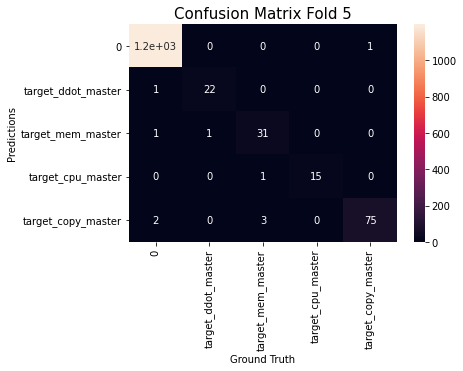

Extracting Feature improtance ...


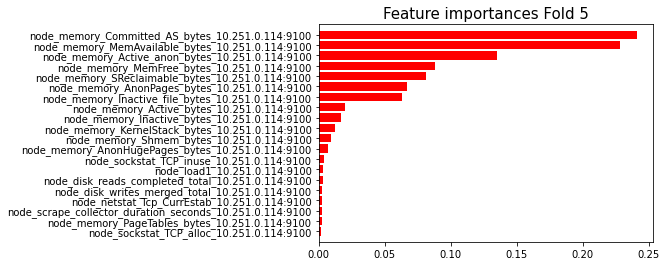

####################################################################################################


In [21]:
# skFold = StratifiedKFold(n_splits=5)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=21)
ml_method = 'rf_test'
print("="*100)
clf_models = []
report = {
    "Accuracy": [],
    "BallancedAccuracy": [],
    "Jaccard": []
}
fold = 1
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    print("Starting fold {}".format(fold))
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    print("Scaling data ....")
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    print("Start training ....")
    clf.fit(Xtrain, ytrain)
    # Append model
    clf_models.append(clf)
    print("Predicting ....")
    ypred = clf.predict(Xtest)
    print("-"*100)
    acc = accuracy_score(ytest, ypred)
    report['Accuracy'].append(acc)
    print("Accuracy score fold {} is: {}".format(fold, acc))
    bacc = balanced_accuracy_score(ytest, ypred)
    report['BallancedAccuracy'].append(bacc)
    print("Ballanced accuracy fold {} score is: {}".format(fold, bacc))
    jaccard = jaccard_score(ytest, ypred, average='micro')
    print("Jaccard score fold {}: {}".format(fold, jaccard))
    report['Jaccard'].append(jaccard)

    ###
    print("Full classification report for fold {}".format(fold))
    print(classification_report(ytest, ypred, digits=4,target_names=definitions))

    cf_report = classification_report(ytest, ypred, output_dict=True, digits=4, target_names=definitions)
    df_classification_report = pd.DataFrame(cf_report).transpose()
    print("Saving classification report")
    classification_rep_name = "classification_{}_fold_{}.csv".format(ml_method, fold)
    df_classification_report.to_csv(os.path.join(model_dir,classification_rep_name), index=False)


    ###
    print("Imbalanced Classification report for fold {}".format(fold))
    print(classification_report_imbalanced(ytest, ypred, digits=4, target_names=definitions))
    imb_cf_report = classification_report_imbalanced(ytest, ypred, output_dict=True, digits=4, target_names=definitions)
    df_imb_classification_report = pd.DataFrame(imb_cf_report).transpose()
    print("Saving imbalanced classification report")
    imb_classification_rep_name = "imb_classification_{}_fold_{}.csv".format(ml_method, fold)
    df_imb_classification_report.to_csv(os.path.join(model_dir,imb_classification_rep_name), index=False)
    ###
    print("Generating confusion matrix fold {}".format(fold))
    cf_matrix = confusion_matrix(ytest, ypred)

    ht_cf=sns.heatmap(cf_matrix, annot=True, yticklabels=list(definitions), xticklabels=list(definitions))
    plt.title('Confusion Matrix Fold {}'.format(fold), fontsize = 15) # title with fontsize 20
    plt.xlabel('Ground Truth', fontsize = 10) # x-axis label with fontsize 15
    plt.ylabel('Predictions', fontsize = 10) # y-axis label with fontsize 15
    cf_fig = "CM_{}_{}.png".format(ml_method, fold)
    ht_cf.figure.savefig(os.path.join(model_dir, cf_fig))
    plt.show()


    print("Extracting Feature improtance ...")
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    sorted_feature = feat_importances.sort_values(ascending=True)
    # print(sorted_feature.head(-10))
    # print(type(sorted_feature.tail(15)))
    # print(X.shape[1])

    # Number of columns
    # print(len(sorted_feature))
    sorted_feature = sorted_feature.tail(20)
    # n_col = X.shape[1]
    n_col = len(sorted_feature)

    # Plot the feature importances of the forest

    plt.figure()
    plt.title("Feature importances Fold {}".format(fold), fontsize = 15)
    plt.barh(range(n_col), sorted_feature,
           color="r", align="center")
    # If you want to define your own labels,
    # change indices to a list of labels on the following line.
    plt.yticks(range(n_col), sorted_feature.index)
    plt.ylim([-1, n_col])
    fi_fig = "FI_{}_{}.png".format(ml_method, fold)
    plt.savefig(os.path.join(model_dir, fi_fig))
    plt.show()
    #increment fold count
    fold+=1
    print("#"*100)

In [22]:
print("Saving final report ...")
# Validation Report
df_report = pd.DataFrame(report)
final_report = "Model_{}_report.csv".format(ml_method)
df_report.to_csv(os.path.join(model_dir,final_report), index=False)

Saving final report ...


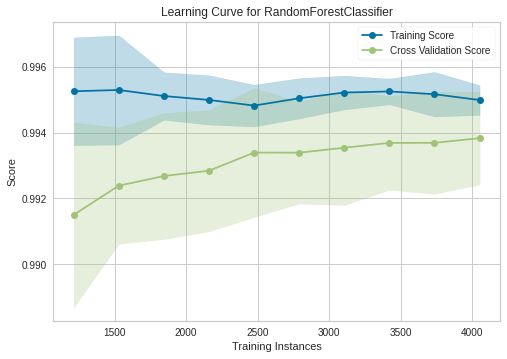

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
from yellowbrick.model_selection import LearningCurve, ValidationCurve, RFECV

sss.split(X, y)
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(clf, cv=sss, scoring='f1_weighted', train_sizes=sizes, n_jobs=5)
viz.fit(X, y)
viz.show()

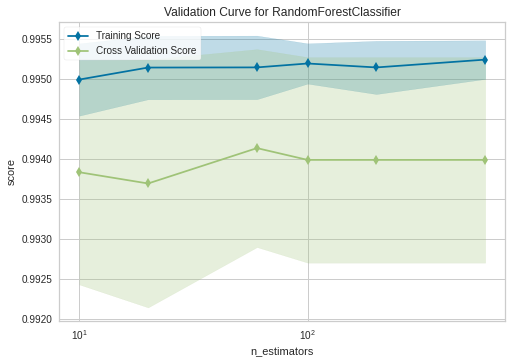

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>

In [26]:
from yellowbrick.model_selection import LearningCurve, ValidationCurve
param_range = [10, 20, 60, 100, 200, 600]

viz = ValidationCurve(
    clf, param_name="n_estimators", param_range=param_range,
    logx=True, cv=sss, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X, y)
viz.show()

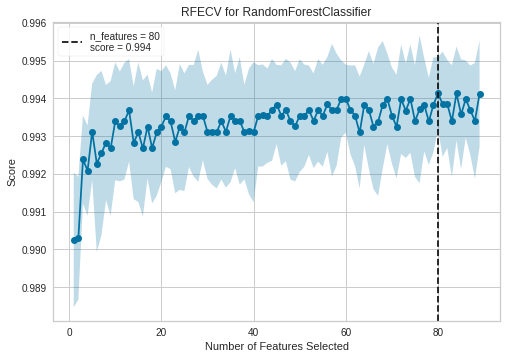

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [28]:
from yellowbrick.model_selection import LearningCurve, ValidationCurve, RFECV


#had to remove max feature 50 to high
params_2 =  {
    'n_estimators': 10,
    'max_depth': 50,
    'min_samples_split': 5,
    'min_samples_leaf': 11,
    'criterion': 'entropy',
    'random_state': 42}

clf_2 = RandomForestClassifier(**params_2)
viz = RFECV(clf_2, cv=sss, scoring="f1_weighted")

viz.fit(X, y)
viz.show()

/home/gabriel/anaconda3/envs/pyaspide/lib/python3.6/site-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  YellowbrickWarning,


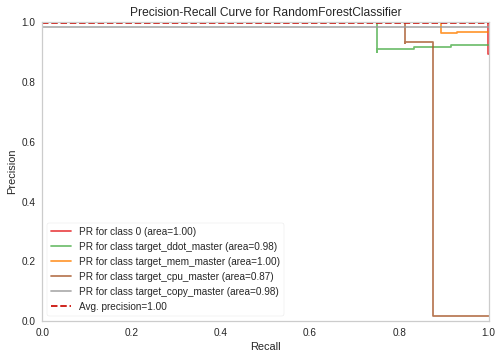

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [30]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

viz = PrecisionRecallCurve(clf, per_class=True, cmap="Set1", classes=definitions)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

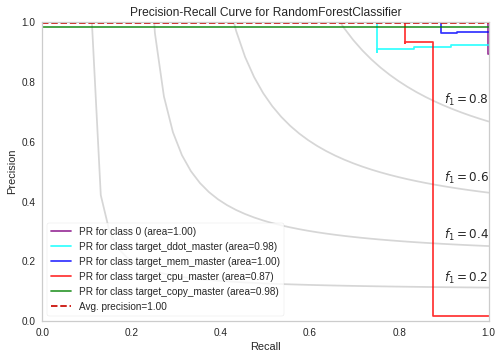

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [31]:
viz = PrecisionRecallCurve(
    clf,
    classes=definitions,
    colors=["purple", "cyan", "blue", "red", "green"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

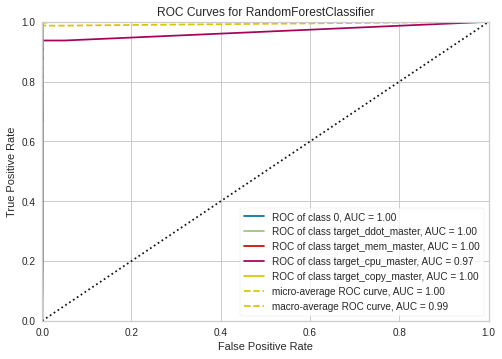

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC

viz = ROCAUC(clf, classes=definitions)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()